In [4]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots
import logging

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [5]:
# create_experiment_snapshots([100])

In [6]:
evaluation = execute_simulation(start_time=0, finish_time=2000, mtd_interval=200, scheme='simultaneous', total_nodes=50)

Adversary: Start SCAN_HOST at 0.0s.
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: IPShuffle triggered 0.0s
MTD: OSDiversity triggered 0.0s
MTD: DAP_OSDiversity_4 triggered 0.0s
MTD: ServiceDiversity triggered 0.0s
MTD: CompleteTopologyShuffle deployed in the network at 0.0s.
MTD: OSDiversity deployed in the network at 0.0s.
Adversary: Processed SCAN_HOST at 5.0s.
Adversary: Start ENUM_HOST at 5.0s.
Adversary: Processed ENUM_HOST at 10.0s.
Adversary: Start SCAN_PORT at 10.0s.
Adversary: Processed SCAN_PORT at 35.0s.
Adversary: Start EXPLOIT_VULN 61a94cd5-f8d6-4c9d-a236-c2d1456d28be at 35.0s.
Adversary: Processed EXPLOIT_VULN 61a94cd5-f8d6-4c9d-a236-c2d1456d28be at 42.0s.
Adversary: Start EXPLOIT_VULN 1feed859-d398-4a13-92fe-e6ceeb702df2 at 42.0s.
Adversary: Processed EXPLOIT_VULN 1feed859-d398-4a13-92fe-e6ceeb702df2 at 51.7s.
Adversary: Start EXPLOIT_VULN d20b5c50-936d-49f4-9708-4d3ce7e04c2e at 51.7s.
Adversary: Processed EXPLOIT_VULN d20b5c50-936d-49f4-9708-4d3ce7e04c2e at 57.5s.
Ad

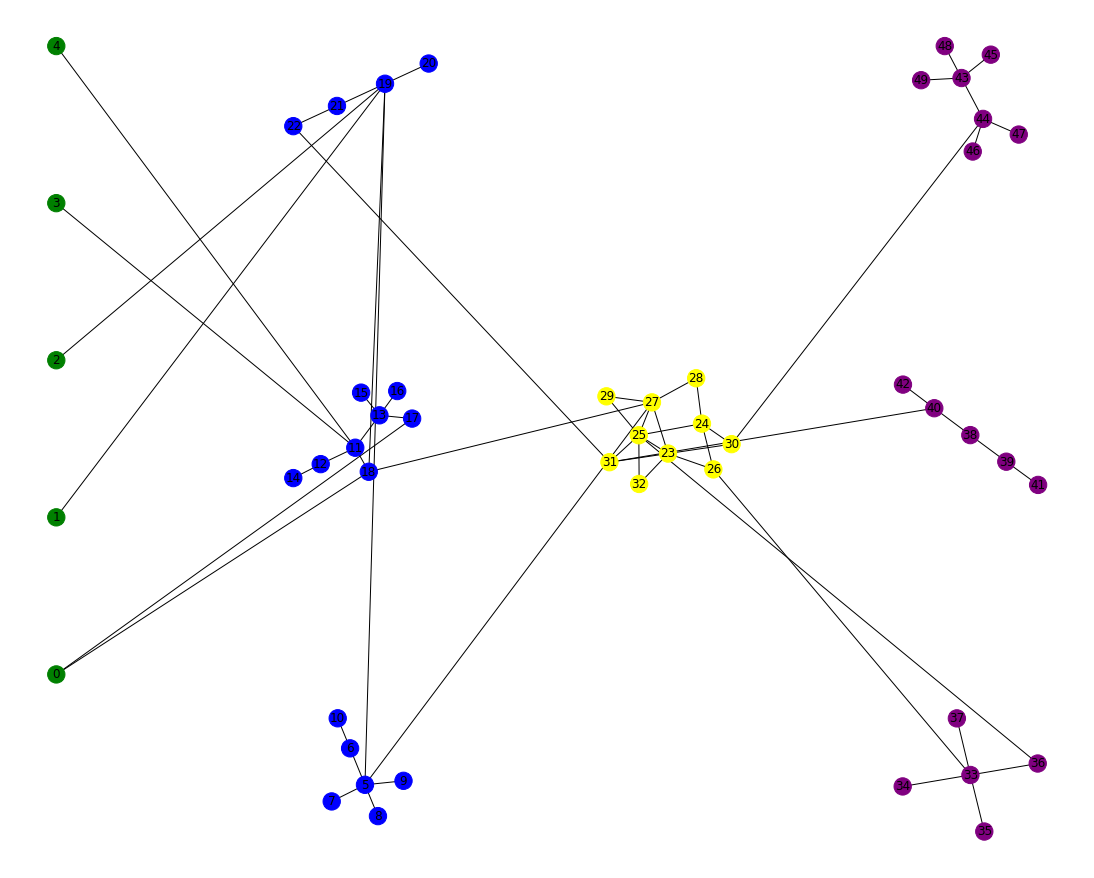

In [7]:
evaluation.get_network().draw()
plt.show()

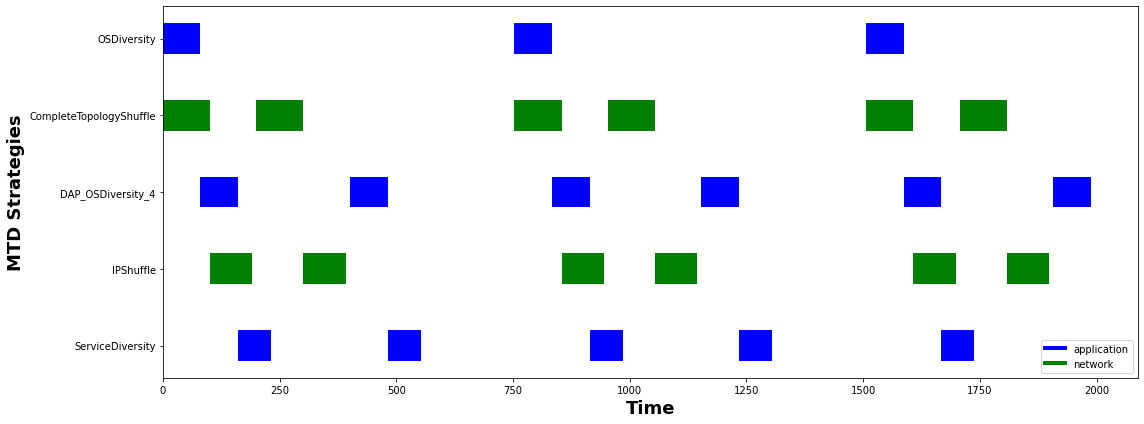

In [8]:
evaluation.visualise_mtd_operation()

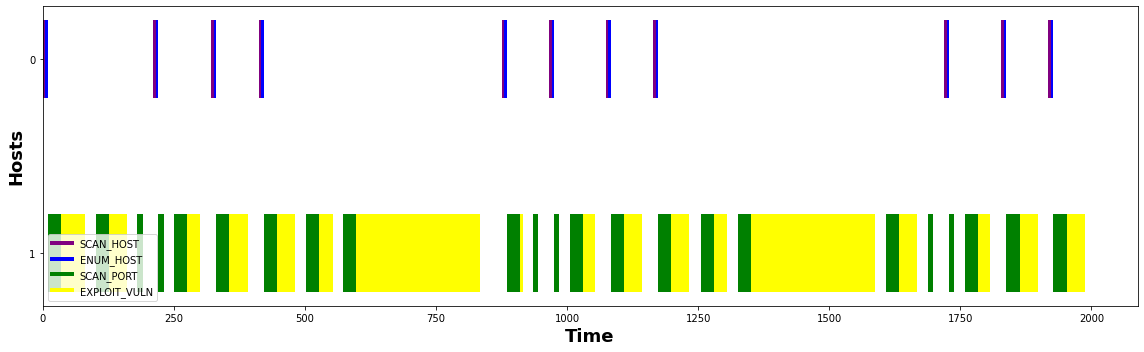

In [9]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  0


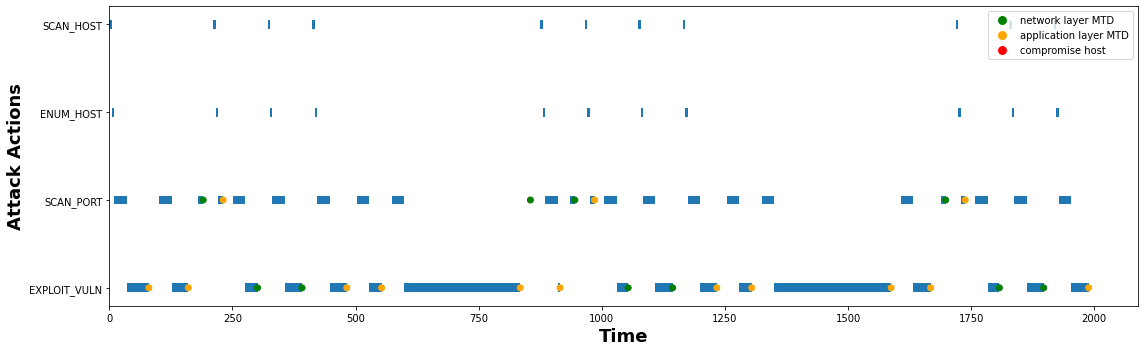

In [10]:
evaluation.visualise_attack_operation()

In [11]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [12]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [13]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [14]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [15]:
evaluation.evaluation_result_by_compromise_checkpoint()

[]